# Exercise - Use OpenAI embeddings to fit sentiment data

Task1: Use sentiment data to calculate embeddings using openai model.
Task2: Fit the Gaussian model on those embeddings

Install requirements

In [2]:
%pip install openai --quiet
%pip install s3fs --quiet

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install -U scikit-learn --quiet

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sagemaker-datawrangler 0.4.3 requires sagemaker-data-insights==0.4.0, but you have sagemaker-data-insights 0.3.3 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


Load sentiment data from `s3://webage-genai-data/sentiment_data_for_exercise/sentiment_data.csv` path

In [4]:
# Your code goes here
import pandas as pd
#df = pd.read_csv("s3://webage-genai-data/sentiment_data_for_exercise/sentiment_data.csv")
df = pd.read_csv("s3://btcampdata/sentiment_data.csv")
print(df.shape)
df.head()

(100, 2)


,text,sentiment
0,I need a break... PFFF... Work Sucksss Will be...,neutral
1,"happy bank holiday monday twitter! bath time, ...",positive
2,"Kayyy XD Yeah, everyone always talks about th...",neutral
3,I don`t think I`ll ever have one of those again,neutral
4,ok... twitter I almost pass out because of you...,negative


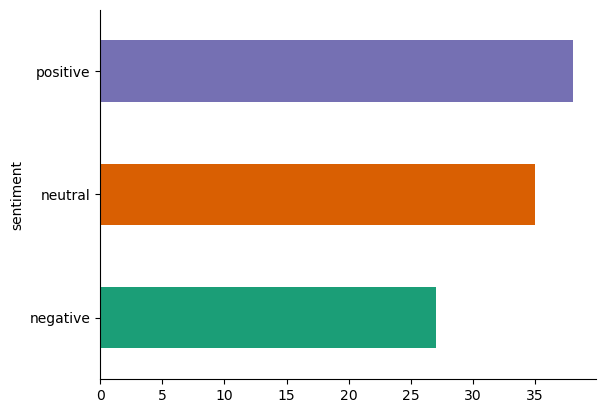

In [6]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Convert 'sentiment' column into numeric values using LabelEncoder

In [7]:
# Your code goes here

from sklearn.preprocessing import LabelEncoder

# Creating a instance of label Encoder.
label_encoder = LabelEncoder()

# Using .fit_transform function to fit label
# encoder and return encoded label
df['sentiment'] = label_encoder.fit_transform(df['sentiment'])
df.head()

,text,sentiment
0,I need a break... PFFF... Work Sucksss Will be...,1
1,"happy bank holiday monday twitter! bath time, ...",2
2,"Kayyy XD Yeah, everyone always talks about th...",1
3,I don`t think I`ll ever have one of those again,1
4,ok... twitter I almost pass out because of you...,0


Convert 'text' column into embeddings using OpenAI model

In [9]:
# Your code goes here
from openai import OpenAI
import os
api_key = ""


In [10]:
input_text = 'Input text'

# new
client = OpenAI(api_key=api_key)

embedding_response = client.embeddings.create(input=input_text,
            model="text-embedding-ada-002")

type(embedding_response)

#embedding = embedding_response["data"][0]["Embedding"]
embedding=embedding_response.data[0].embedding
len(embedding)

1536

In [15]:
#fix
def get_embeddings(input_text,model="text-embedding-ada-002"):
    embedding_response = client.embeddings.create(
        input=input_text,
        model=model)
    return embedding_response.data[0].embedding

#test out the function
get_embeddings("cats and dogs")[:10]

[-0.009604713879525661,
 0.001167986774817109,
 -0.007270371075719595,
 -0.03137670457363129,
 -0.008880937471985817,
 0.020617859438061714,
 -0.012075988575816154,
 -0.0030548598151654005,
 0.0016064911615103483,
 -0.01860954239964485]

In [16]:
df['vectors'] = df['text'].apply(lambda x: list(get_embeddings(x)))
df.head()

,text,sentiment,vectors
0,I need a break... PFFF... Work Sucksss Will be...,1,"[-0.015209888108074665, -0.008079429157078266,..."
1,"happy bank holiday monday twitter! bath time, ...",2,"[-0.005067901220172644, -0.0010816864669322968..."
2,"Kayyy XD Yeah, everyone always talks about th...",1,"[-0.0133826844394207, -0.005757438018918037, -..."
3,I don`t think I`ll ever have one of those again,1,"[-0.023799024522304535, -0.0029215821996331215..."
4,ok... twitter I almost pass out because of you...,0,"[-0.03098464384675026, -0.013740213587880135, ..."


Split dataset into train/test

In [17]:
# Your code goes here

X = df['vectors'].apply(lambda x: pd.Series(x))
Y = df['sentiment']

X.shape, Y.shape

((100, 1536), (100,))

In [18]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,1526,1527,1528,1529,1530,1531,1532,1533,1534,1535
0,-0.015210,-0.008079,0.010175,-0.026598,-0.029313,0.029181,-0.028232,-0.000481,0.004554,-0.013747,...,0.044259,-0.005341,0.021800,-0.029576,-0.018268,0.009602,-0.006158,-0.014828,0.021049,-0.022657
1,-0.005068,-0.001082,-0.004360,-0.016973,-0.022635,-0.002856,-0.004023,-0.011919,-0.019764,-0.018883,...,0.036163,-0.008240,0.005963,-0.011451,-0.021834,0.002060,-0.014182,0.011204,0.000913,-0.041371
2,-0.013383,-0.005757,-0.001924,-0.022990,-0.000567,0.020212,-0.008113,-0.015834,0.003549,-0.007937,...,0.016096,0.001191,0.002739,-0.041603,-0.006855,0.014628,0.014274,-0.006668,0.002454,-0.049022
3,-0.023799,-0.002922,0.018411,-0.010872,-0.009774,0.010181,-0.016977,-0.005556,-0.007061,0.001794,...,0.016241,-0.021538,0.014303,-0.030388,-0.007203,0.038166,-0.015142,-0.017856,0.022985,-0.033179
4,-0.030985,-0.013740,-0.010256,-0.019049,-0.017956,0.009643,-0.001022,-0.016230,0.012627,-0.008464,...,0.020867,0.018470,0.029298,-0.017785,-0.023304,0.030036,-0.007575,0.006699,0.008174,-0.036254


In [19]:
Y.head()

0    1
1    2
2    1
3    1
4    0
Name: sentiment, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.25, random_state=125
)

Fit 'GaussianNB' model on embeddings from OpenAI model

In [21]:
# Your code goes here
from sklearn.naive_bayes import GaussianNB

# Build a Gaussian Classifier
model = GaussianNB()

# Model training
model.fit(X_train, y_train)

GaussianNB()

Evaluate your model

In [23]:
# Your code goes here
from sklearn.metrics import accuracy_score, f1_score

y_pred = model.predict(X_test)
accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuray)
print("F1 score:", f1)

Accuracy: 0.56
F1 score: 0.564


# Use a SKLearn NN classifier

A Naive Bayes is not a great model to use for this task. Try it with a MLPClassifier from sklearn instead.

In [24]:
from sklearn.neural_network import MLPClassifier

nn = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(10, 10), random_state=1,max_iter=999)

nn.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(10, 10), max_iter=999,
              random_state=1, solver='lbfgs')

and Evaluate

In [25]:
# Your code goes here
from sklearn.metrics import accuracy_score, f1_score

y_pred = nn.predict(X_test)
accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuray)
print("F1 score:", f1)

Accuracy: 0.8
F1 score: 0.8186666666666668
